## 1. Import Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [3]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
train = pd.read_csv('order_products__train.csv')

In [5]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
print('orders.csv : ', orders.shape)
print('prior.csv : ', prior.shape)
print('train.csv : ', train.shape)
print('products.csv : ', products.shape)
print('aisles.csv : ', aisles.shape)

orders.csv :  (3421083, 7)
prior.csv :  (32434489, 4)
train.csv :  (1384617, 4)
products.csv :  (49688, 4)
aisles.csv :  (134, 2)


## 2. Data Preprocessing

In [8]:
prior = prior[0:300000]

In [9]:
# 각 주문 (order id)에 어떠한 상품들이 담겨있는지 확인하기!
order_prior = pd.merge(prior, orders, on=['order_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [10]:
# 각 주문(order id) 당 담겨있는 물품 종류 수는?
order_prior.groupby('order_id')['product_id'].count()

order_id
2         9
3         8
4        13
5        26
6         3
7         2
8         1
9        15
10       15
11        5
12       15
13       13
14       11
15        5
16        3
18       28
19        3
20        8
21        5
22       14
23       14
24        3
25       14
26        8
27       27
28       16
29        5
30        3
31       10
32        9
         ..
31597    15
31598     6
31599    13
31602    16
31603     1
31604     2
31605     1
31606     6
31607    14
31608     4
31609    19
31610    14
31611     7
31612    17
31613     1
31614    19
31615     7
31616    23
31617     4
31618     4
31619     5
31620     2
31621    19
31622     7
31623    17
31624     5
31625    17
31626     3
31627     2
31628     9
Name: product_id, Length: 29724, dtype: int64

In [11]:
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,7,prior,17,0,10,28.0
221646,23391,42803,2,1,7,prior,17,0,10,28.0
221647,23391,8277,3,1,7,prior,17,0,10,28.0
221648,23391,37602,4,1,7,prior,17,0,10,28.0
221649,23391,40852,5,1,7,prior,17,0,10,28.0


In [12]:
mt = pd.merge(prior,products, on = ['product_id','product_id'])
mt = pd.merge(mt,orders,on=['order_id','order_id'])
mt = pd.merge(mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [13]:
mt.shape

(300000, 14)

In [14]:
mt['product_name'].value_counts()[0:10]

Banana                    4432
Bag of Organic Bananas    3563
Organic Strawberries      2370
Organic Baby Spinach      2242
Organic Hass Avocado      1985
Organic Avocado           1626
Large Lemon               1380
Strawberries              1343
Organic Raspberries       1293
Limes                     1270
Name: product_name, dtype: int64

In [15]:
len(mt['product_name'].unique())

24836

### 수 많은 고객들을 몇 개의 cluster로 묶고싶음!

In [16]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
cust_prod.shape

(25831, 134)

## 3. Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [26]:
explained_variance = pca.explained_variance_ratio_

In [27]:
import matplotlib.pyplot as plt

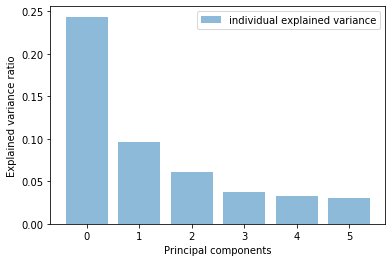

In [28]:
plt.figure(figsize=(6, 4))
plt.bar(range(6),explained_variance, alpha=0.5, align='center', label='individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [31]:
ps6 = pd.DataFrame(pca_samples)
ps6.head()

,0,1,2,3,4,5
0,-0.286251,1.005868,-1.030292,-0.898977,-0.587559,-0.998643
1,-1.972748,-0.487659,-0.120542,0.213100,0.045917,-0.181818
2,-1.168974,1.284089,3.228124,0.594052,-0.648843,-1.091797
3,-1.433967,1.250081,3.261985,1.237748,-0.353539,-0.346337
4,-2.070709,-0.422148,-0.101553,0.278215,0.005919,-0.097108


In [32]:
# 차원이 143에서 6으로 축소되었다
ps6.shape

(25831, 6)

### Visualization

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.cm as cm

In [52]:
# choose PC0 & PC1
# ( since every PCs (from 1~6) are representatives of the dataset )
tocluster = ps6[[0,1]]
print (tocluster.shape)
print (tocluster.head())

(25831, 2)
          0         1
0 -0.286251  1.005868
1 -1.972748 -0.487659
2 -1.168974  1.284089
3 -1.433967  1.250081
4 -2.070709 -0.422148


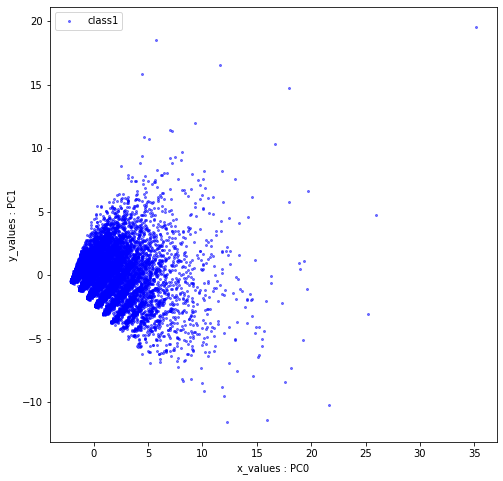

In [53]:
fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values : PC0')
plt.ylabel('y_values : PC1')
plt.legend()
plt.show()

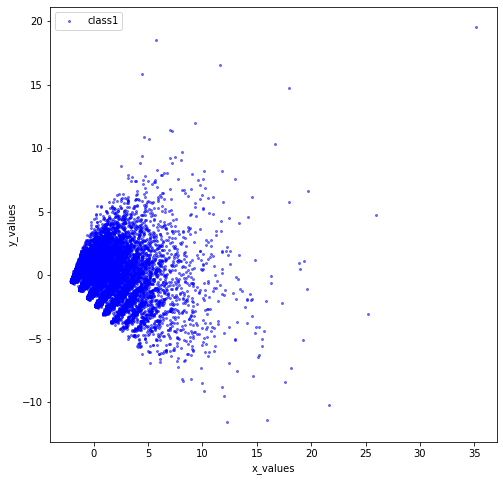

In [54]:
fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[0], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

## 4. K-Means

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

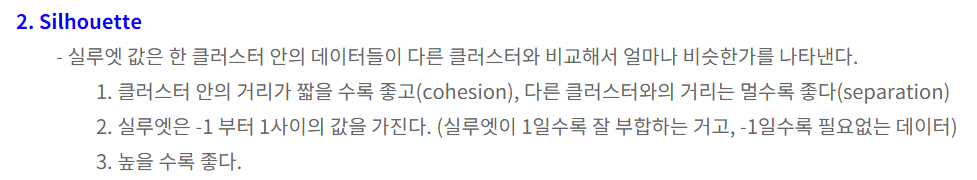

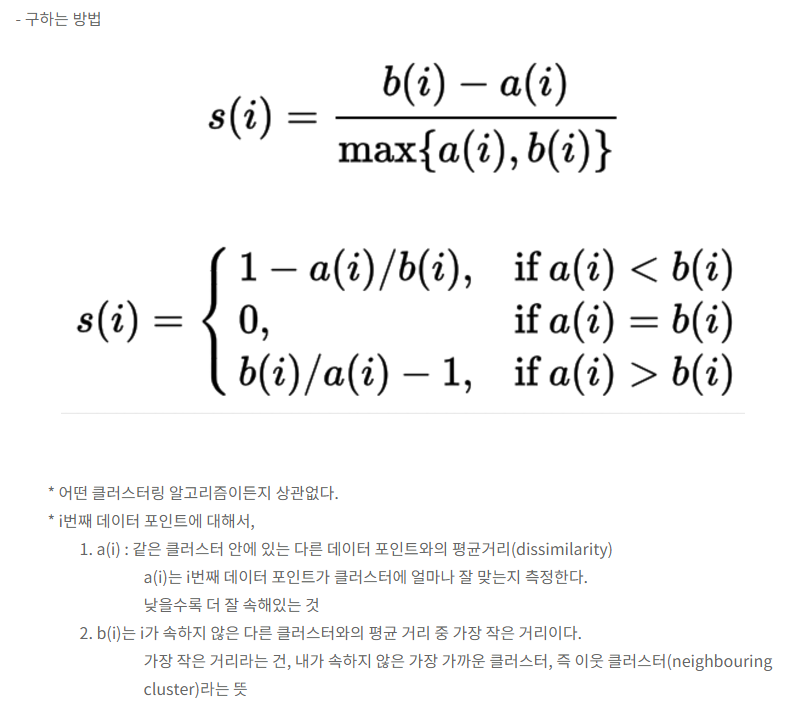

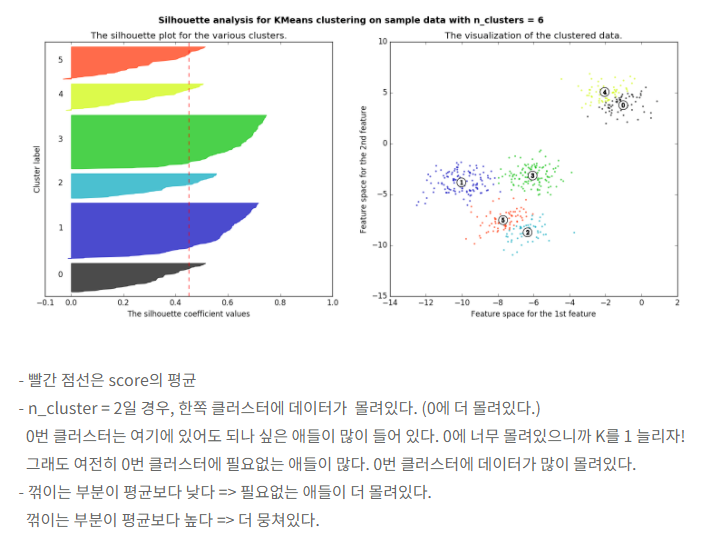

In [66]:
from sklearn.metrics import silhouette_score

range_n_clusters = [3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tocluster)
    centers = clusterer.cluster_centers_
    score = silhouette_score (tocluster, preds, metric='euclidean')
    
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 3, silhouette score is 0.49551063185791827)
For n_clusters = 4, silhouette score is 0.5159651750674658)
For n_clusters = 5, silhouette score is 0.4664832889010432)
For n_clusters = 6, silhouette score is 0.4693897782136089)
For n_clusters = 7, silhouette score is 0.4504776146713168)
For n_clusters = 8, silhouette score is 0.45048057546667447)


### n_cluster=4

In [56]:
clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-1.30803869 -0.09402684]
 [ 7.31640486 -1.01409667]
 [ 1.86201152 -1.32833353]
 [ 1.45301505  1.99012389]]


In [57]:
tocluster.head()

,0,1
0,-0.286251,1.005868
1,-1.972748,-0.487659
2,-1.168974,1.284089
3,-1.433967,1.250081
4,-2.070709,-0.422148


In [58]:
centers

array([[-1.30803869, -0.09402684],
       [ 7.31640486, -1.01409667],
       [ 1.86201152, -1.32833353],
       [ 1.45301505,  1.99012389]])

In [59]:
import collections
collections.Counter(c_preds)

Counter({0: 16412, 2: 4259, 3: 4131, 1: 1029})

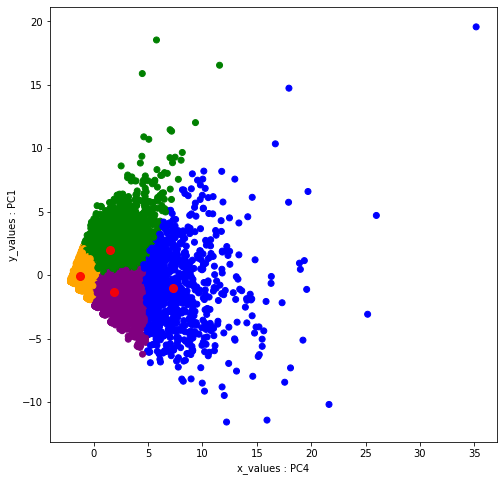

In [61]:
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]

# plotting scatterplot
plt.scatter(tocluster[0],tocluster[1],  color = colored)

# plotting centers
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9)

plt.xlabel('x_values : PC4')
plt.ylabel('y_values : PC1')
plt.show()

In [67]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,0
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# one column added ('cluster')
clust_prod.shape

(25831, 135)

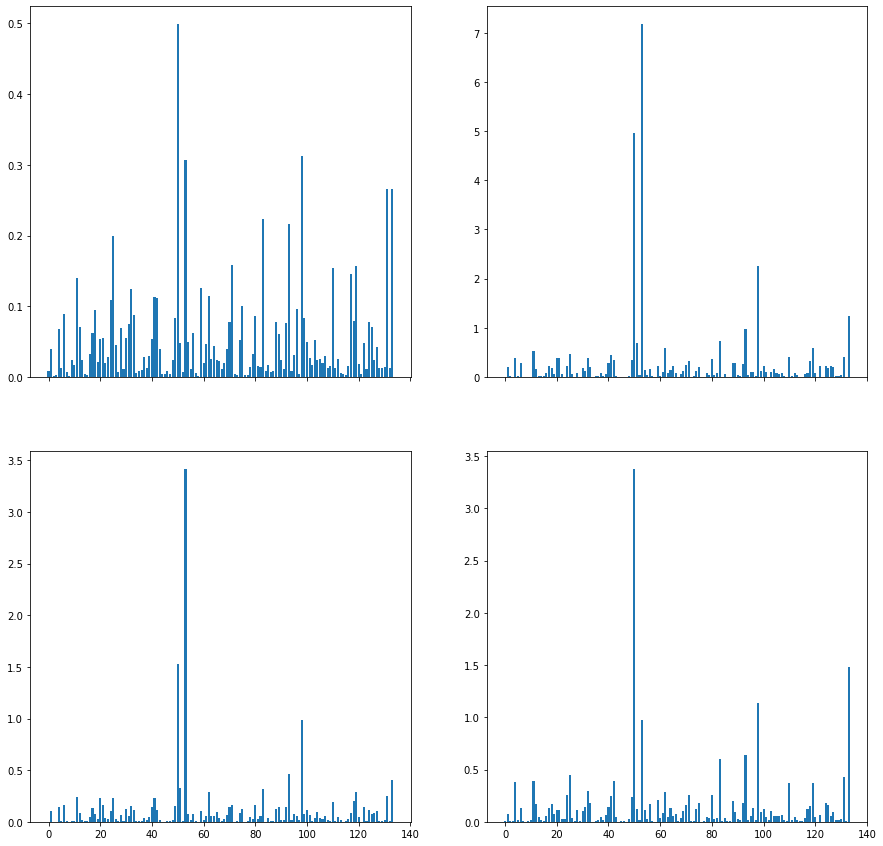

In [69]:
f,ax = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
ax[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)

c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
ax[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)

c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
ax[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)

c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
ax[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)

plt.show()

### top 10 goods bought by each clusters?

In [74]:
c0.sort_values(ascending=False)[0:10]
#c1.sort_values(ascending=False)[0:10]
#c2.sort_values(ascending=False)[0:10]
#c3.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.499208
packaged vegetables fruits       0.313246
fresh vegetables                 0.307214
water seltzer sparkling water    0.266573
yogurt                           0.265781
milk                             0.223800
packaged cheese                  0.215879
chips pretzels                   0.199976
ice cream ice                    0.157750
soy lactosefree                  0.157141
dtype: float64